In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')

In [3]:
from train import setup_cfg, print_args
import argparse
from dassl.utils import setup_logger, set_random_seed, collect_env_info
from dassl.engine import build_trainer
import torch
from notebooks.utils import viz_tensors
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [4]:
parser = argparse.ArgumentParser()
parser.add_argument('--root', type=str, default='data', help='path to dataset')
parser.add_argument(
    '--output-dir', type=str, default='output', help='output directory'
)
parser.add_argument(
    '--resume',
    type=str,
    default='',
    help='checkpoint directory (from which the training resumes)'
)
parser.add_argument(
    '--seed',
    type=int,
    default=-1,
    help='only positive value enables a fixed seed'
)
parser.add_argument(
    '--source-domains',
    type=str,
    default=['mnist'],
    nargs='+',
    help='source domains for DA/DG'
)
parser.add_argument(
    '--target-domains',
    type=str,
    default=['svhn'],
    nargs='+',
    help='target domains for DA/DG'
)
parser.add_argument(
    '--transforms', type=str, nargs='+', help='data augmentation methods'
)
parser.add_argument(
    '--config-file', type=str, default='configs/trainers/digit5.yaml', help='path to config file'
)
parser.add_argument(
    '--dataset-config-file',
    type=str,
    default='configs/datasets/digit5.yaml',
    help='path to config file for dataset setup'
)
parser.add_argument(
    '--trainer', type=str, default='AdaMatch', help='name of trainer'
)
parser.add_argument(
    '--backbone', type=str, default='', help='name of CNN backbone'
)
parser.add_argument('--head', type=str, default='', help='name of head')
parser.add_argument(
    '--eval-only', action='store_true', help='evaluation only'
)
parser.add_argument(
    '--model-dir',
    type=str,
    default='',
    help='load model from this directory for eval-only mode'
)
parser.add_argument(
    '--load-epoch',
    type=int,
    help='load model weights at this epoch for evaluation'
)
parser.add_argument(
    '--no-train', action='store_true', help='do not call trainer.train()'
)
parser.add_argument(
    'opts',
    default=None,
    nargs=argparse.REMAINDER,
    help='modify config options using the command-line'
)
sys.argv = ['-f']
args = parser.parse_args()

In [5]:
args

Namespace(backbone='', config_file='configs/trainers/digit5.yaml', dataset_config_file='configs/datasets/digit5.yaml', eval_only=False, head='', load_epoch=None, model_dir='', no_train=False, opts=[], output_dir='output', resume='', root='data', seed=-1, source_domains=['mnist'], target_domains=['svhn'], trainer='AdaMatch', transforms=None)

In [6]:
cfg = setup_cfg(args)
if cfg.SEED >= 0:
    print('Setting fixed seed: {}'.format(cfg.SEED))
    set_random_seed(cfg.SEED)
setup_logger(cfg.OUTPUT_DIR)

if torch.cuda.is_available() and cfg.USE_CUDA:
    torch.backends.cudnn.benchmark = True

print_args(args, cfg)
print('Collecting env info ...')
print('** System info **\n{}\n'.format(collect_env_info()))

trainer = build_trainer(cfg)

***************
** Arguments **
***************
backbone: 
config_file: configs/trainers/digit5.yaml
dataset_config_file: configs/datasets/digit5.yaml
eval_only: False
head: 
load_epoch: None
model_dir: 
no_train: False
opts: []
output_dir: output
resume: 
root: data
seed: -1
source_domains: ['mnist']
target_domains: ['svhn']
trainer: AdaMatch
transforms: None
************
** Config **
************
DATALOADER:
  K_TRANSFORMS: 1
  NUM_WORKERS: 4
  TEST:
    BATCH_SIZE: 500
    SAMPLER: SequentialSampler
  TRAIN_U:
    BATCH_SIZE: 192
    N_DOMAIN: 0
    N_INS: 16
    SAME_AS_X: False
    SAMPLER: RandomSampler
  TRAIN_X:
    BATCH_SIZE: 64
    N_DOMAIN: 0
    N_INS: 16
    SAMPLER: RandomSampler
DATASET:
  ALL_AS_UNLABELED: False
  CIFAR_C_LEVEL: 1
  CIFAR_C_TYPE: 
  NAME: Digit5
  NUM_LABELED: 250
  ROOT: data
  SOURCE_DOMAINS: ['mnist']
  STL10_FOLD: -1
  TARGET_DOMAINS: ['svhn']
  VAL_PERCENT: 0.1
INPUT:
  COLORJITTER_B: 0.4
  COLORJITTER_C: 0.4
  COLORJITTER_H: 0.1
  COLORJITTER_S: 

AttributeError: 'AdaMatch' object has no attribute 'num_batches'

In [ ]:
trainer.train()

In [7]:
trainer.test_loader

In [8]:
batch_x = next(iter(trainer.train_loader_x))
batch_u = next(iter(trainer.train_loader_u))

In [9]:
batch_x.keys()

dict_keys(['label', 'domain', 'impath', 'img', 'img2', 'img0'])

In [10]:
batch_u.keys()

dict_keys(['label', 'domain', 'impath', 'img', 'img2', 'img0'])

In [11]:
input_x, input_x2, label_x, input_u, input_u2, label_u = \
    trainer.parse_batch_train(batch_x, batch_u)

In [12]:
input_x.shape, input_x2.shape, label_x.shape

(torch.Size([64, 3, 32, 32]), torch.Size([64, 3, 32, 32]), torch.Size([64]))

In [13]:
input_u.shape, input_u2.shape, label_u.shape

(torch.Size([192, 3, 32, 32]), torch.Size([192, 3, 32, 32]), torch.Size([192]))

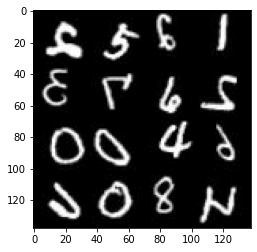

In [14]:
grid = viz_tensors(input_x, normalize=True)

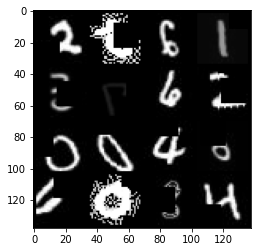

In [15]:
grid = viz_tensors(input_x2, normalize=True)

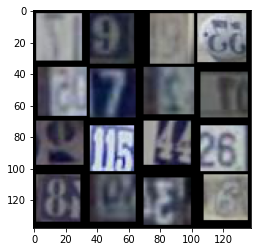

In [16]:
grid = viz_tensors(input_u, normalize=True)

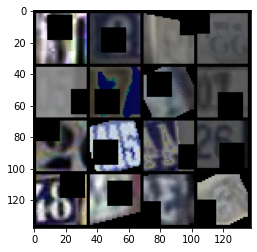

In [17]:
grid = viz_tensors(input_u2, normalize=True)

In [18]:
out = trainer.forward_backward(batch_x, batch_u)

In [20]:
out[0].shape

torch.Size([192])